In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# load the image

[[17]]
(array([[[1305.,  855.],
        [1351., 1376.],
        [ 810., 1404.],
        [ 783.,  882.]]], dtype=float32),)


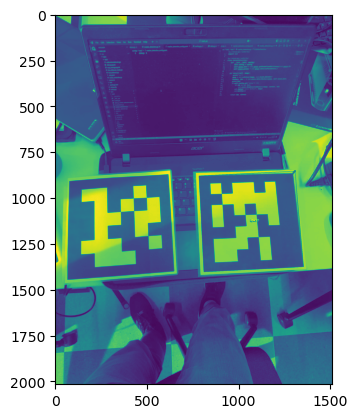

In [ ]:
image = cv2.imread("image.jpeg")

arucoDict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_7X7_1000)
aruco_params = cv2.aruco.DetectorParameters()
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

corners, ids, _ = cv2.aruco.detectMarkers(gray, arucoDict, parameters=aruco_params)
# plt.imshow(image)
# draw the markers
cv2.aruco.drawDetectedMarkers(gray, corners, ids)
plt.imshow(gray)
print(ids)
print(corners)

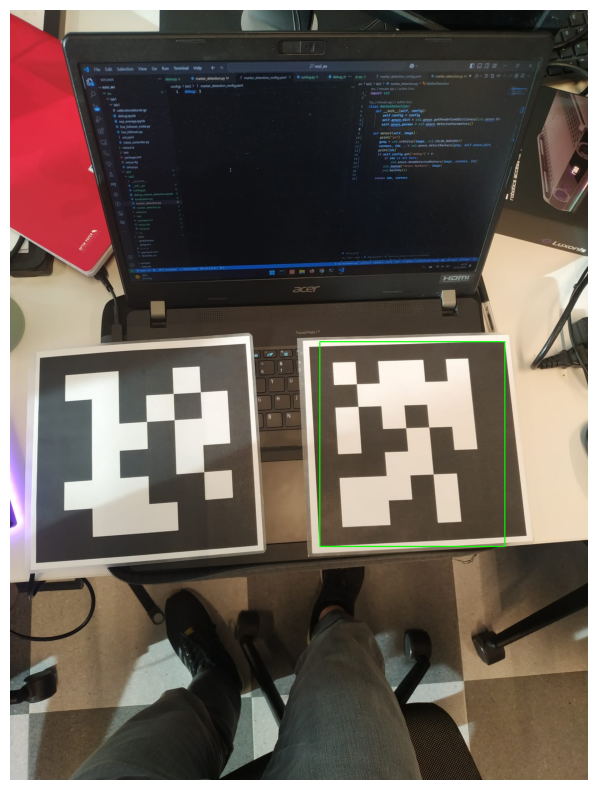

Detected Marker Corners: (array([[[1294.,  868.],
        [1351., 1376.],
        [ 810., 1404.],
        [ 783.,  882.]]], dtype=float32),)
0.2988101999904544


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("image.jpeg")

# Create the ArUco dictionary and detector parameters
arucoDict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_7X7_1000)
dic = {
    
}
aruco_params = cv2.aruco.DetectorParameters()

# Detect the ArUco markers
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
corners, ids, _ = cv2.aruco.detectMarkers(gray, arucoDict, parameters=aruco_params)

marker_size = 0.1  # size of the marker in meters
camera_matrix = np.array([[1000, 0, 320], [0, 1000, 240], [0, 0, 1]], dtype=np.float32)  # sample camera matrix
dist_coeffs = np.zeros((4, 1), dtype=np.float32)

# Draw the bounding boxes around the detected markers
annotated_image = image.copy()
if len(corners) > 0:
    for corner in corners[0]:
        x1, y1 = int(corner[0][0]), int(corner[0][1])
        x2, y2 = int(corner[2][0]), int(corner[2][1])
        cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Display the results
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

# Print the detected marker corners
print("Detected Marker Corners:", corners)

rvec, tvec, _ = cv2.aruco.estimatePoseSingleMarkers(corners, marker_size, camera_matrix, dist_coeffs)
distance = np.linalg.norm(tvec)
print(distance)

In [ ]:
ARUCO_DICT = {
  "DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
  "DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
  "DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
  "DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
  "DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL,
  "DICT_ARUCO_MIP_36h12": cv2.aruco.DICT_ARUCO_MIP_36h12
}

frame = cv2.imread("image3.jpeg")

all_corners, all_marker_ids = [], []
for desired_aruco_dictionary in ARUCO_DICT.keys():
  # Load the desired ArUco dictionary
    this_aruco_dictionary = cv2.aruco.getPredefinedDictionary(ARUCO_DICT[desired_aruco_dictionary])
    this_aruco_parameters = cv2.aruco.DetectorParameters()

    (corners, ids, rejected) = cv2.aruco.detectMarkers(
        frame, this_aruco_dictionary, parameters=this_aruco_parameters)
    all_corners.append(corners)
    all_marker_ids.append(ids)
        
# Check that at least one ArUco marker was detected
if len(corners) > 0:
    # Flatten the ArUco IDs list
    ids = ids.flatten()
    
    # Loop over the detected ArUco corners
    for (marker_corner, marker_id) in zip(corners, ids):
    
        # Extract the marker corners
        corners = marker_corner.reshape((4, 2))
        (top_left, top_right, bottom_right, bottom_left) = corners
        
        # Convert the (x,y) coordinate pairs to integers
        top_right = (int(top_right[0]), int(top_right[1]))
        bottom_right = (int(bottom_right[0]), int(bottom_right[1]))
        bottom_left = (int(bottom_left[0]), int(bottom_left[1]))
        top_left = (int(top_left[0]), int(top_left[1]))
        
        # Draw the bounding box of the ArUco detection
        cv2.line(frame, top_left, top_right, (0, 255, 0), 2)
        cv2.line(frame, top_right, bottom_right, (0, 255, 0), 2)
        cv2.line(frame, bottom_right, bottom_left, (0, 255, 0), 2)
        cv2.line(frame, bottom_left, top_left, (0, 255, 0), 2)
        
        # Calculate and draw the center of the ArUco marker
        center_x = int((top_left[0] + bottom_right[0]) / 2.0)
        center_y = int((top_left[1] + bottom_right[1]) / 2.0)
        cv2.circle(frame, (center_x, center_y), 4, (0, 0, 255), -1)
        
        # Draw the ArUco marker ID on the video frame
        # The ID is always located at the top_left of the ArUco marker
        cv2.putText(frame, str(marker_id), 
        (top_left[0], top_left[1] - 15),
        cv2.FONT_HERSHEY_SIMPLEX,
        0.5, (0, 255, 0), 2)

cv2.imshow('frame',frame)

AttributeError: module 'cv2.aruco' has no attribute 'DetectorParameters_create'

Marker 22 rvec: [[[ 8.53115419e-04 -1.16467897e-04 -2.96504820e+00]]]
Marker 22 tvec: [[[2.11182209e+00 2.00999145e-01 1.08030610e-03]]]
Marker 22 distance: 2.12 meters
Marker 91 rvec: [[[-1.98324283e+00  2.43596928e+00 -1.10153292e-03]]]
Marker 91 tvec: [[[2.36042309 1.2356083  0.00340074]]]
Marker 91 distance: 2.66 meters
Marker 149 rvec: [[[ 1.24157088e-03 -3.40857706e-04 -6.76879084e-01]]]
Marker 149 tvec: [[[1.71078746e+01 5.69045730e+00 8.75118143e-03]]]
Marker 149 distance: 18.03 meters
[[1946.  143.]
 [1957.  136.]
 [1964.  230.]
 [1953.  236.]]
[[693. 385.]
 [688. 346.]
 [696. 342.]
 [699. 381.]]
[[1935.  653.]
 [1954.  647.]
 [1967.  647.]
 [1964.  654.]]


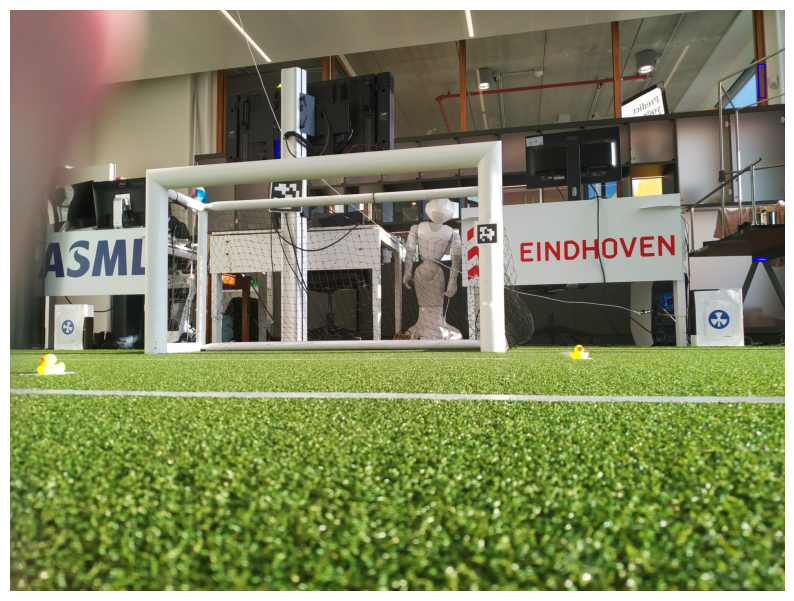

[array([[[1946.,  143.],
        [1957.,  136.],
        [1964.,  230.],
        [1953.,  236.]]], dtype=float32), array([[[693., 385.],
        [688., 346.],
        [696., 342.],
        [699., 381.]]], dtype=float32), array([[[1935.,  653.],
        [1954.,  647.],
        [1967.,  647.],
        [1964.,  654.]]], dtype=float32)]
[array([22], dtype=int32), array([91], dtype=int32), array([149], dtype=int32)]


In [49]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("image3.jpeg")

# Create the ArUco dictionaries
aruco_dictionaries = [
    # cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_1000),
    cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_1000),
    cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_1000),
    cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_7X7_1000),
    cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_ARUCO_MIP_36h12)
]
aruco_params = cv2.aruco.DetectorParameters()

# Detect the ArUco markers
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
all_corners, all_ids = list(), list()
for aruco_dict in aruco_dictionaries:
    corners, ids, _ = cv2.aruco.detectMarkers(gray, aruco_dict, parameters=aruco_params)
    if ids is not None:
        all_corners.extend(corners)
        all_ids.extend(ids)

# Estimate the distance to the markers
marker_size = 0.1  # size of the marker in meters
camera_matrix = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]], dtype=np.float32)  # sample camera matrix
dist_coeffs = np.zeros((4, 1), dtype=np.float32)  # no lens distortion

distances = []
for i, corners in enumerate(all_corners):
    rvec, tvec, _ = cv2.aruco.estimatePoseSingleMarkers(corners, marker_size, camera_matrix, dist_coeffs)
    print(f"Marker {all_ids[i][0]} rvec: {rvec}")
    print(f"Marker {all_ids[i][0]} tvec: {tvec}")
    distance = np.linalg.norm(tvec)
    distances.append(distance)
    print(f"Marker {all_ids[i][0]} distance: {distance:.2f} meters")

# Draw the bounding boxes around the detected markers
annotated_image = image.copy()
if len(all_corners) > 0:
    for corner in all_corners:
        corner = corner[0]
        print(corner)
        x1, y1 = int(corner[0][0]), int(corner[0][1])
        x2, y2 = int(corner[2][0]), int(corner[2][1])
        cv2.rectangle(annotated_image, (x1, y1), (x2, y2), (255, 0, 0), 2)

# Display the results
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

print(all_corners)
print(all_ids)